# Guided Capstone Step 4. Pre-Processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#os.getcwd(), os.listdir()
#os.chdir('data')
#os.listdir()
dfno = pd.read_csv("data\step3_output_noindex.csv")

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [3]:
dfno.tail()

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,SnowMaking_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
170,Hogadon Basin,Wyoming,8000,640,7400,0,0.0,0,0,0,...,92.0,32.0,121.000000,61.0,80.0,48.000000,48.0,95.000000,0.0,1
171,Sleeping Giant Ski Resort,Wyoming,7428,810,6619,0,0.0,0,0,0,...,184.0,18.0,61.000000,81.0,310.0,42.000000,42.0,77.000000,0.0,1
172,Snow King Resort,Wyoming,7808,1571,6237,0,0.0,0,0,1,...,400.0,250.0,121.000000,80.0,300.0,59.000000,59.0,123.000000,110.0,1
173,Snowy Range Ski & Recreation Area,Wyoming,9663,990,8798,0,0.0,0,0,0,...,75.0,30.0,131.000000,59.0,250.0,49.000000,49.0,120.053004,0.0,1
174,White Pine Ski Area,Wyoming,9500,1100,8400,0,0.0,0,0,0,...,370.0,0.0,115.103943,81.0,150.0,57.916957,49.0,120.053004,0.0,1


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

Hint: you can see an example of how to execute this in Aiden's article on preprocessing [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967). 

In [4]:
dfo = dfno[["state"]]
dfab = pd.concat([dfno.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
dfab.iloc[:3, ::5]

,Name,fastEight,double,LongestRun_mi,averageSnowfall,clusters,state_Connecticut,state_Maine,state_Missouri,state_New Mexico,state_Pennsylvania,state_Vermont,state_Wyoming
0,Hilltop Ski Area,0.0,0,1.0,69.0,0,0,0,0,0,0,0,0
1,Sunrise Park Resort,0.0,1,1.2,250.0,1,0,0,0,0,0,0,0
2,Yosemite Ski & Snowboard Area,0.0,3,0.4,300.0,1,0,0,0,0,0,0,0


In [5]:
dfab.state_Wyoming.tail(10)

165    0
166    0
167    0
168    0
169    0
170    1
171    1
172    1
173    1
174    1
Name: state_Wyoming, dtype: uint8

## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

In [6]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = dfab.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = dfab["AdultWeekend"]

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled = scaler.transform(X)
df_scaled = pd.DataFrame(X_scaled)
df_scaled.iloc[::17, ::9]

,0,9,18,27,36,45,54
0,-0.499697,-1.176069,-1.658111,-0.171499,-0.306186,-0.132068,-0.107521
17,1.697940,-0.507848,-1.658111,5.830952,-0.306186,-0.132068,-0.107521
34,-0.898312,-1.176069,-1.447640,-0.171499,-0.306186,-0.132068,-0.107521
51,-0.660688,-0.507848,1.569112,-0.171499,3.265986,-0.132068,-0.107521
68,-0.813336,-1.176069,0.095814,-0.171499,-0.306186,-0.132068,-0.107521
85,-0.694369,0.160373,-0.254971,-0.171499,-0.306186,-0.132068,-0.107521
102,-0.581583,0.160373,0.165971,-0.171499,-0.306186,-0.132068,-0.107521
119,-0.682009,-0.507848,-0.465442,-0.171499,-0.306186,-0.132068,-0.107521
136,-0.604758,-0.507848,-1.447640,-0.171499,-0.306186,-0.132068,-0.107521
153,0.529287,0.828594,-0.535599,-0.171499,-0.306186,-0.132068,-0.107521


In [7]:
df_scaled.sum().max(), df_scaled.sum().min(), df_scaled.sum().mean(), df_scaled.sum().count(), 

(9.581224702515101e-14, -1.3866685577568205e-13, -3.0689904478382903e-16, 59)

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [8]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, y.dtype

((131, 59), (44, 59), (131,), (44,), dtype('float64'))

Here we start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

# Guided Capstone Step 5. Modeling


This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part: modeling! In this exercise, you'll build three different models and compare each model's performance. In the end, you'll choose the best model for demonstrating insights to Big Mountain management.



### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with a Training Dataset

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [10]:
#all first model set
from sklearn import linear_model
#from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn import metrics
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

Hint: you will have to use the `predict()` method here as it's used in this [DSM article](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b) about modeling. 

In [11]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = lm.predict(X_test)
y_pred

array([ 6.76315918e+01,  5.46706543e+01,  5.46989746e+01,  4.42839355e+01,
        5.85495605e+01,  5.72253418e+01,  5.61608887e+01,  7.98972168e+01,
        4.41940918e+01,  6.24401855e+01,  7.78425293e+01,  8.06237793e+01,
        4.36198730e+01,  5.62644043e+01,  6.29714355e+01,  5.38581543e+01,
        9.55261230e+01,  3.21862793e+01,  4.32097168e+01,  3.89245605e+01,
        4.88269043e+01,  5.39206543e+01,  6.30651855e+01,  6.47097168e+01,
        3.66550293e+01,  7.23972168e+01,  5.85886230e+01,  3.62097168e+01,
        5.66315918e+01,  5.23894043e+01,  5.84284668e+01,  8.26520996e+01,
        9.05593262e+01,  7.15769043e+01,  6.84987793e+01,  7.02331543e+01,
       -5.96448412e+13,  5.57390137e+01,  6.03581543e+01,  5.04714355e+01,
        5.11472168e+01,  3.43425293e+01,  6.43464355e+01,  3.07604980e+01])

In [12]:
y_test

array([79.        , 59.        , 65.        , 48.        , 64.16681004,
       64.16681004, 62.        , 89.        , 40.        , 49.        ,
       79.        , 78.        , 54.        , 75.        , 59.        ,
       59.        , 79.        , 39.        , 40.        , 35.        ,
       49.        , 50.        , 60.        , 48.        , 49.        ,
       72.        , 64.16681004, 43.        , 56.        , 64.16681004,
       64.16681004, 72.        , 81.        , 75.        , 80.        ,
       77.        , 64.16681004, 68.        , 65.        , 47.        ,
       49.        , 35.        , 70.        , 55.        ])

In [13]:
df = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
df["Delta"] = y_test - y_pred
df.describe()

,y_test,y_pred,Delta
count,44.000000,4.400000e+01,4.400000e+01
mean,60.772747,-1.355565e+12,1.355565e+12
std,13.904073,8.991798e+12,8.991798e+12
min,35.000000,-5.964484e+13,-1.670972e+01
25%,49.000000,4.769116e+01,-3.101318e+00
50%,63.083405,5.644800e+01,4.485596e+00
75%,72.000000,6.544019e+01,7.481797e+00
max,89.000000,9.552612e+01,5.964484e+13


**<font color='red'> RemAB: FIND OUT what causes big difference between y_test values and y_pred </font>**

In [14]:
minwert = y_pred.min()
maxwert = y_pred.max()
result_min = np.where(y_pred == minwert)
result_max = np.where(y_pred == maxwert)
minwert, maxwert, result_min, result_max

(-59644841160197.23,
 95.526123046875,
 (array([36], dtype=int64),),
 (array([16], dtype=int64),))

In [15]:
print(df.loc[36])

y_test    6.416681e+01
y_pred   -5.964484e+13
Delta     5.964484e+13
Name: 36, dtype: float64


In [16]:
dfpr = df.drop(36,axis=0)
dfpr
dfpr.describe()

,y_test,y_pred,Delta
count,43.000000,43.000000,43.000000
mean,60.693815,58.076450,2.617365
std,14.058646,15.214718,8.634990
min,35.000000,30.760498,-16.709717
25%,49.000000,49.649170,-3.137451
50%,62.000000,56.631592,4.329346
75%,72.000000,66.170654,6.877594
max,89.000000,95.526123,24.239502


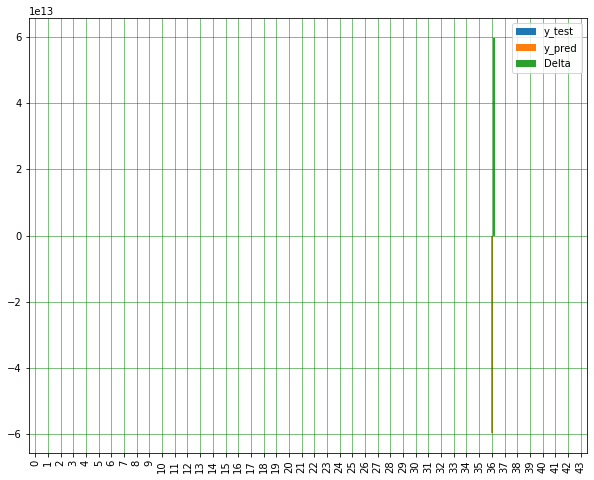

In [17]:
df.plot(kind="bar", figsize=(10,8))
plt.grid(which="major", linestyle="-",linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":",linewidth="0.5", color="black")
plt.show;

<function matplotlib.pyplot.show(*args, **kw)>

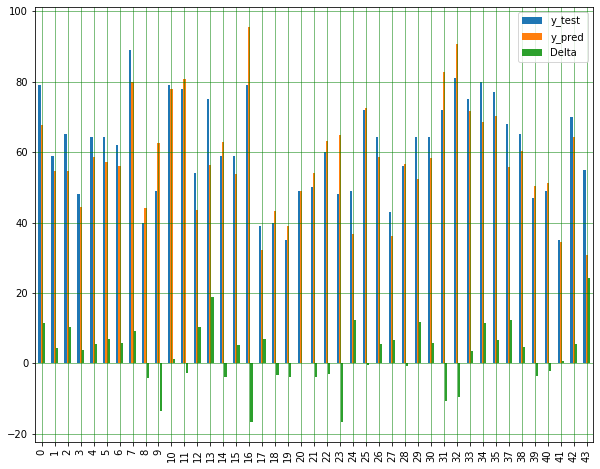

In [18]:
dfpr.plot(kind="bar", figsize=(10,8))
plt.grid(which="major", linestyle="-",linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":",linewidth="0.5", color="black")
plt.show

In [19]:
print("mean absolute error:", metrics.mean_absolute_error(y_test, y_pred))
print("mean squared error:", metrics.mean_squared_error(y_test, y_pred))
print("root mean squared error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mean absolute error: 1355564571831.1553
mean squared error: 8.085243356892753e+25
root mean squared error: 8991798127678.775


**<font color='red'> RemAB: While scores for training model are ok, test scores fail due to delta in in 36 </font>**

In [20]:
lm.score(X_train, y_train)

0.8820101386815046

In [21]:
lm.score(X_test, y_test)

-4.279501944939056e+23

## Review Model Outcomes — Iterate over additional models as needed

In [22]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model

metrics.explained_variance_score(y_test, y_pred)

-4.182240537099165e+23

In [23]:
metrics.mean_absolute_error(y_test, y_pred)

1355564571831.1553

**<font color='teal'> Print the intercept value from the linear model. </font>**

Hint: our linear regression model `lm` has an attribute `intercept_` for the intercept

In [24]:
lm.intercept_

-340827663716.5481

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the resulting `AdultWeekend` value. Also, because we took the time to scale our x values in the training data, we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 


Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

In [25]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
# pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coef = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coef.sort_values("Coefficient").tail(15)

,Coefficient
state_Minnesota,1.245784e+13
state_Vermont,1.245784e+13
triple,1.334044e+13
state_Wisconsin,1.384464e+13
state_Pennsylvania,1.447631e+13
state_New Hampshire,1.447631e+13
state_California,1.507384e+13
surface,1.560558e+13
double,1.627293e+13
state_Michigan,1.669726e+13


In [26]:
states = coef.loc['state_Alaska':'state_Wyoming'].sort_values('Coefficient')
states

,Coefficient
state_New Jersey,4.913363e+07
state_South Dakota,4.495875e+12
state_Alaska,4.495875e+12
state_Arizona,4.495875e+12
state_Nevada,4.495875e+12
state_Maryland,4.495875e+12
state_Rhode Island,4.495875e+12
state_Tennessee,4.495875e+12
state_Indiana,6.339830e+12
state_Missouri,6.339830e+12


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

Hint: Try to construct another model using exactly the steps we followed above. 

#### Model 2

In [27]:
dfno.head(5)

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,SnowMaking_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,30.0,30.0,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,0
1,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,800.0,80.0,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,1
2,Yosemite Ski & Snowboard Area,California,7800,600,7200,0,0.0,0,0,0,...,88.0,0.0,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,1
3,Boreal Mountain Resort,California,7700,500,7200,0,0.0,0,1,1,...,380.0,200.0,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,1
4,Dodge Ridge,California,8200,1600,6600,0,0.0,0,0,1,...,862.0,0.0,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,1


In [28]:
# prepare data and create X and y for split
X2 = dfno.drop(['Name', 'state', 'AdultWeekend'], axis=1)
y2 = dfno["AdultWeekend"]

# scaling of data for linear regression model
scaler2 = preprocessing.StandardScaler().fit(X2)

X_scaled2 = scaler2.transform(X2)
X2.shape, y2.shape

((175, 24), (175,))

In [29]:
# flattened array
y2 = y2.ravel()

# splitting data
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled2, y2, test_size=0.25, random_state=1)

In [30]:
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape, y2.dtype

((131, 24), (44, 24), (131,), (44,), dtype('float64'))

In [31]:
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2_train,y2_train)

In [32]:
y2_pred = lm2.predict(X2_test)
y2_pred

array([74.10156253, 54.1547558 , 42.70570425, 48.94274891, 62.99517328,
       58.79457634, 56.19933254, 73.5005001 , 45.37752248, 58.55097596,
       73.52810244, 76.55854522, 46.13658739, 64.98071198, 62.96662876,
       52.25236403, 97.55736493, 40.54327174, 42.63025261, 39.49549249,
       51.24612992, 53.73677209, 66.18915645, 64.28566135, 42.22667336,
       62.949105  , 53.40979925, 39.15895237, 48.48803376, 56.22296101,
       63.65726694, 71.01588455, 91.37384765, 69.16135606, 73.18024607,
       78.38590322, 51.60720849, 58.29281122, 55.04347097, 51.72612459,
       54.93633278, 35.71229152, 58.97890051, 39.20565423])

In [33]:
y2_test

array([79.        , 59.        , 65.        , 48.        , 64.16681004,
       64.16681004, 62.        , 89.        , 40.        , 49.        ,
       79.        , 78.        , 54.        , 75.        , 59.        ,
       59.        , 79.        , 39.        , 40.        , 35.        ,
       49.        , 50.        , 60.        , 48.        , 49.        ,
       72.        , 64.16681004, 43.        , 56.        , 64.16681004,
       64.16681004, 72.        , 81.        , 75.        , 80.        ,
       77.        , 64.16681004, 68.        , 65.        , 47.        ,
       49.        , 35.        , 70.        , 55.        ])

In [34]:
lm2.score(X2_train, y2_train)

0.8080926967749344

In [35]:
lm2.score(X2_test, y2_test)

0.6065327857979099

In [36]:
metrics.explained_variance_score(y2_test, y2_pred)

0.6407287358442297

In [37]:
metrics.mean_absolute_error(y2_test, y2_pred)

7.026161317146083

In [38]:
lm2.intercept_

56.37926181431588

In [39]:
lm2.coef_

array([ 1.30128806e+01, -9.27541946e-01, -1.54089459e+01, -2.35367281e-14,
       -2.30926389e-14, -2.22044605e-16,  5.38948841e-01,  1.48957560e+00,
        6.43048721e-01,  8.92116387e-01, -1.37050019e+00,  5.52807226e-01,
        3.80995190e-01,  1.89476465e+00,  1.03115422e+00, -4.86652826e-01,
        1.01553134e+00,  2.12319078e+00, -2.22528195e-01, -3.80564981e-02,
        9.56186503e+00, -2.22745824e+00, -3.01092612e-01,  2.94430421e+00])

In [40]:
coef2 = pd.DataFrame(abs(lm2.coef_), X2.columns, columns=['Coefficient'])
coef2.sort_values("Coefficient").tail(21)

,Coefficient
averageSnowfall,0.038056
yearsOpen,0.222528
NightSkiing_ac,0.301093
Runs,0.380995
SkiableTerrain_ac,0.486653
fastQuads,0.538949
total_chairs,0.552807
triple,0.643049
double,0.892116
vertical_drop,0.927542


**<font color='teal'> When reviewing our new model coefficients, we see `summit_elev` is now in the number two spot. This is also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time, rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [41]:
# prepare data and create X and y for split
X3 = dfno.drop(['Name', 'state', 'AdultWeekend', 'summit_elev', 'base_elev'], axis=1)
y3 = dfno["AdultWeekend"]

# scaling of data for linear regression model
scaler3 = preprocessing.StandardScaler().fit(X3)

X_scaled3 = scaler3.transform(X3)
X3.shape, y3.shape

((175, 22), (175,))

In [42]:
# flattened array
y3 = y3.ravel()

# splitting data
X3_train, X3_test, y3_train, y3_test = train_test_split(X_scaled3, y3, test_size=0.25, random_state=1)

In [43]:
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape, y3.dtype

((131, 22), (44, 22), (131,), (44,), dtype('float64'))

In [44]:
lm3 = linear_model.LinearRegression()
model3 = lm3.fit(X3_train,y3_train)

In [45]:
y3_pred = lm3.predict(X3_test)
y3_pred;

In [46]:
lm3.score(X3_train, y3_train)

0.7859791281822311

In [47]:
lm3.score(X3_test, y3_test)

0.6444423540523518

In [48]:
metrics.explained_variance_score(y3_test, y3_pred)

0.6774139234165787

In [49]:
metrics.mean_absolute_error(y3_test, y3_pred)

6.517684839856637

In [50]:
lm3.intercept_

56.390807092964124

In [51]:
lm3.coef_

array([ 1.70466066e+00,  0.00000000e+00, -6.66133815e-16,  6.66133815e-16,
        3.20657528e-01,  1.57996943e+00,  3.27508084e-01,  9.78236403e-01,
       -1.03670057e+00,  6.09869490e-01,  3.79252077e-01,  1.98296584e+00,
        1.24073307e+00, -1.70087496e+00,  1.27047520e+00,  1.64998620e+00,
       -2.50132016e-01, -1.48417427e+00,  9.74639008e+00, -1.90862486e+00,
       -3.24553435e-01,  2.08559731e+00])

In [52]:
coef3 = pd.DataFrame(abs(lm3.coef_), X3.columns, columns=['Coefficient'])
coef3.sort_values("Coefficient").tail(10)

,Coefficient
SnowMaking_ac,1.270475
averageSnowfall,1.484174
quad,1.579969
daysOpenLastYear,1.649986
SkiableTerrain_ac,1.700875
vertical_drop,1.704661
projectedDaysOpen,1.908625
TerrainParks,1.982966
clusters,2.085597
AdultWeekday,9.746390


## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell — you will discuss this selection more in the next step of the guided capstone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | -4.182240537099165e+23 | 1355564571831.1553 |-|
| Model 2. | 0.6407287358442297 | 7.026161317146083 |'state'|
| Model 3. | 0.6774139234165787 | 6.517684839856637 |'state','summit_elev','base_elev'|

AB - Model Selection:


Regarding prediction of Adult Weekend price I choose MODEL 3 as it offers the highest explained variance value and the lowest mean absolute error value. Compared to the other two models it offers the highest predictability, but use of another scikit model could offer better insights than linear regression.